In [256]:
# Imported all necessary libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt
import pylab 
import scipy.stats as stats
## Display all the columns of the dataframe


# importing sys
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '../Python_module/')
import common_functions as my_module
import imp
imp.reload(my_module)

pd.pandas.set_option('display.max_columns',None)

In [257]:
# Load dataframe into df object.
df = pd.read_csv("cleaned_dataset.csv")

In [258]:
df = df.iloc[::-1]


In [259]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
1067,4.801723,4.784069,4.840242,4.779963,1.75,16.0,1.0,2019.0,1.342865
1066,4.804267,4.801641,7.093713,4.766523,0.25,17.0,1.0,2019.0,1.283708
1065,4.781977,4.804185,4.805577,4.772970,-2.20,18.0,1.0,2019.0,0.951658
1064,4.812347,4.781977,4.831269,4.781977,3.09,19.0,1.0,2019.0,1.211941
1063,4.766609,4.812184,4.816403,4.755743,-4.47,20.0,1.0,2019.0,1.368639


#### Feature Transformation :-
    Feature transformation is the process of  transforming a feature in to a new one with specific funtion.

Let's make various graphs of features with respect to time, so that we can analyze how
features are correlated with time.


In [260]:
my_module.combine_day_month_year(
    df_name=df,
    list_of_day_month_year_columns=['Year','Month','Day'],
)

In [261]:
df.head()

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million),Date
1067,4.801723,4.784069,4.840242,4.779963,1.75,16,1,2019,1.342865,2019-01-16
1066,4.804267,4.801641,7.093713,4.766523,0.25,17,1,2019,1.283708,2019-01-17
1065,4.781977,4.804185,4.805577,4.772970,-2.20,18,1,2019,0.951658,2019-01-18
1064,4.812347,4.781977,4.831269,4.781977,3.09,19,1,2019,1.211941,2019-01-19
1063,4.766609,4.812184,4.816403,4.755743,-4.47,20,1,2019,1.368639,2019-01-20


In [262]:
df = my_module.drop_column_from_df(
    dataframe_name=df,
    list_column_name=['Day','Month','Year']
)


In [263]:
df.head()

,Price,Open,High,Low,Change %,Volume(In Million),Date
1067,4.801723,4.784069,4.840242,4.779963,1.75,1.342865,2019-01-16
1066,4.804267,4.801641,7.093713,4.766523,0.25,1.283708,2019-01-17
1065,4.781977,4.804185,4.805577,4.772970,-2.20,0.951658,2019-01-18
1064,4.812347,4.781977,4.831269,4.781977,3.09,1.211941,2019-01-19
1063,4.766609,4.812184,4.816403,4.755743,-4.47,1.368639,2019-01-20


### Resampling 

B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseconds
U, us     microseconds
N         nanoseconds

In [264]:
#Let's first make date column to index in order to perform resampling time series functions.
df.set_index('Date',inplace=True)
df.index.name = None

In [265]:
df.head()

,Price,Open,High,Low,Change %,Volume(In Million)
2019-01-16,4.801723,4.784069,4.840242,4.779963,1.75,1.342865
2019-01-17,4.804267,4.801641,7.093713,4.766523,0.25,1.283708
2019-01-18,4.781977,4.804185,4.805577,4.772970,-2.20,0.951658
2019-01-19,4.812347,4.781977,4.831269,4.781977,3.09,1.211941
2019-01-20,4.766609,4.812184,4.816403,4.755743,-4.47,1.368639


In [266]:
# business month end frequency
df.resample('BM').max().head()

,Price,Open,High,Low,Change %,Volume(In Million)
2019-01-31,4.812347,4.812184,7.093713,4.781977,3.55,2.008214
2019-02-28,5.064492,5.004013,5.070852,4.985523,14.05,2.777576
2019-03-29,4.965498,4.949823,7.093713,4.928195,8.61,2.826722
2019-04-30,5.188279,5.188279,5.223270,5.148366,5.30,3.864092
2019-05-31,5.602783,5.602709,5.662926,5.581615,14.13,3.224460


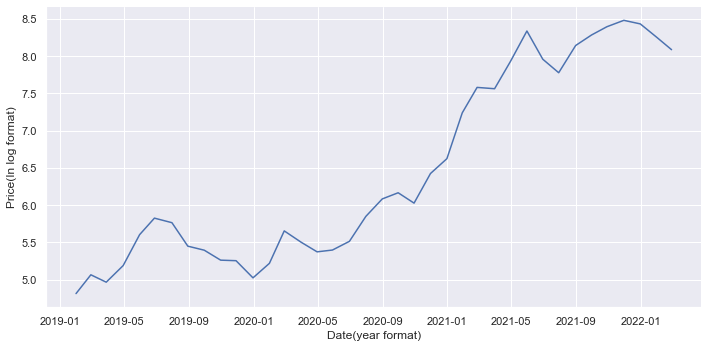

In [267]:
# Time vs Price
my_module.line_graph(
    df_name=df.resample('BM').max(),
    x_axis_column=df.resample('BM').max().index,
    y_axis_column='Price',
    x_axis_title='Date(year format)',
    y_axis_title='Price(In log format)'
    
)

In [268]:
# mean of price for every month
df.resample('MS').mean()

,Price,Open,High,Low,Change %,Volume(In Million)
2019-01-01,4.743993,4.750848,4.921072,4.722437,-0.657333,1.480054
2019-02-01,4.834976,4.819392,4.853185,4.800487,1.654800,1.950481
2019-03-01,4.916232,4.914321,5.017278,4.895649,0.221379,2.437163
2019-04-01,5.105118,5.107254,5.132330,5.076473,-0.165357,2.305251
2019-05-01,5.373103,5.356791,5.406601,5.326303,1.766129,2.546439
2019-06-01,5.613358,5.609894,5.642500,5.578217,0.454643,2.143964
2019-07-01,5.501843,5.505996,5.533864,5.465159,-0.325333,2.205119
2019-08-01,5.287111,5.294522,5.368292,5.258791,-0.680667,2.175180
2019-09-01,5.221915,5.213654,5.241588,5.189305,0.872759,2.244936
2019-10-01,5.186020,5.183575,5.210825,5.159368,0.308276,2.397512


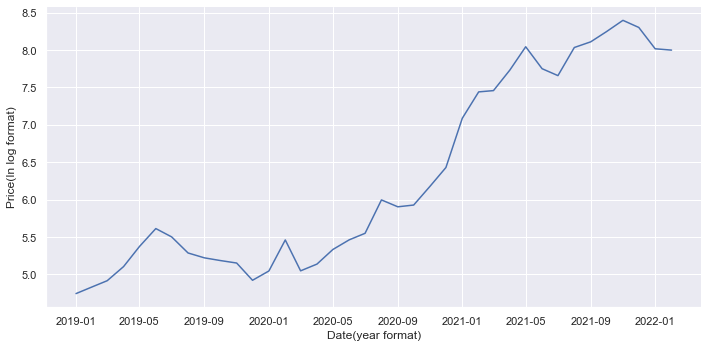

In [269]:
my_module.line_graph(
    df_name=df.resample('MS').mean(),
    x_axis_column=df.resample('MS').mean().index,
    y_axis_column='Price',
    x_axis_title='Date(year format)',
    y_axis_title='Price(In log format)'
)

In [270]:
# business quarter endfrequency
df.resample('BQ').mean()

,Price,Open,High,Low,Change %,Volume(In Million)
2019-03-29,4.846124,4.840850,4.935874,4.819868,0.582687,2.042643
2019-06-28,5.346635,5.339833,5.375674,5.310081,0.775172,2.342714
2019-09-30,5.346650,5.348491,5.391540,5.313949,-0.116154,2.208759
2019-12-31,5.086841,5.089943,5.110423,5.063748,-0.258391,2.413797
2020-03-31,5.178727,5.172932,5.231323,5.163291,0.683047,2.850439
2020-06-30,5.310577,5.306919,5.357558,5.279902,0.424290,2.652744
2020-09-30,5.812036,5.806298,5.837065,5.775139,0.672333,2.176561
2020-12-31,6.181802,6.174426,6.204784,6.158447,0.831322,1.942248
2021-03-31,7.327712,7.316798,7.363056,7.265845,1.236132,0.667309
2021-06-30,7.835280,7.828938,7.863901,7.777807,0.637607,0.675734


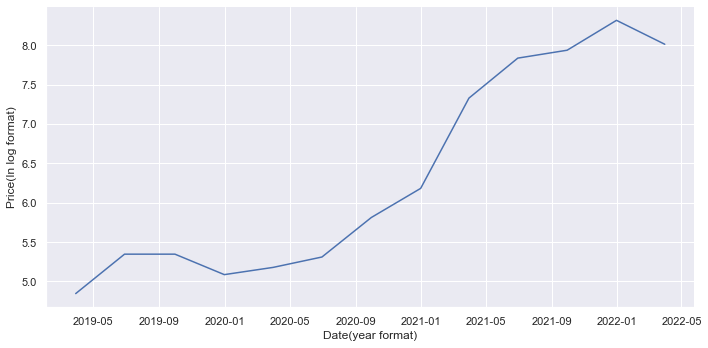

In [271]:
my_module.line_graph(
    df_name=df.resample('BQ').mean(),
    x_axis_column=df.resample('BQ').mean().index,
    y_axis_column='Price',
    x_axis_title='Date(year format)',
    y_axis_title='Price(In log format)'
)

### Let's make data stationary by applying various time series methods.

#### 1) Simple Moving Average

In [272]:
df.head()

,Price,Open,High,Low,Change %,Volume(In Million)
2019-01-16,4.801723,4.784069,4.840242,4.779963,1.75,1.342865
2019-01-17,4.804267,4.801641,7.093713,4.766523,0.25,1.283708
2019-01-18,4.781977,4.804185,4.805577,4.772970,-2.20,0.951658
2019-01-19,4.812347,4.781977,4.831269,4.781977,3.09,1.211941
2019-01-20,4.766609,4.812184,4.816403,4.755743,-4.47,1.368639


In [273]:
df['Price_Moving_Average'] = df['Price'].rolling(window=10).mean()

<AxesSubplot:>

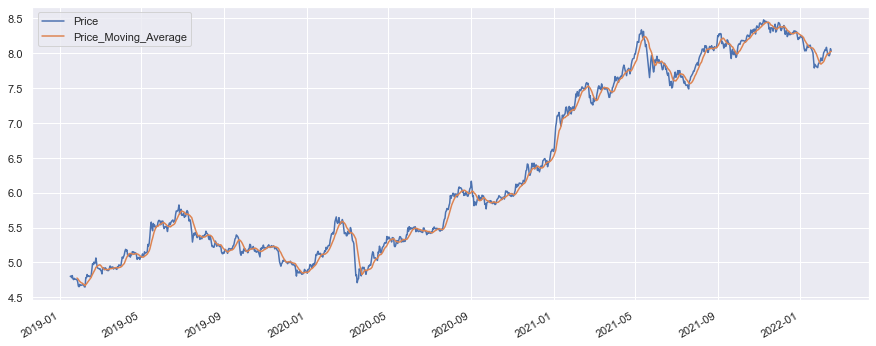

In [274]:
df[['Price','Price_Moving_Average']].plot(figsize=(15,6))

In [275]:
df.head(30)

,Price,Open,High,Low,Change %,Volume(In Million),Price_Moving_Average
2019-01-16,4.801723,4.784069,4.840242,4.779963,1.75,1.342865,NaN
2019-01-17,4.804267,4.801641,7.093713,4.766523,0.25,1.283708,NaN
2019-01-18,4.781977,4.804185,4.805577,4.772970,-2.20,0.951658,NaN
2019-01-19,4.812347,4.781977,4.831269,4.781977,3.09,1.211941,NaN
2019-01-20,4.766609,4.812184,4.816403,4.755743,-4.47,1.368639,NaN
2019-01-21,4.754021,4.766609,4.771024,4.737513,-1.25,1.568616,NaN
2019-01-22,4.772632,4.754021,4.783065,4.721708,1.88,1.631199,NaN
2019-01-23,4.760805,4.772632,4.779208,4.749444,-1.18,1.470176,NaN
2019-01-24,4.759692,4.760805,4.764905,4.744323,-0.11,1.477049,NaN
2019-01-26,4.752124,4.749271,4.767544,4.748144,0.29,1.247032,4.776620


#### 2) Exponential Moving Average

In [276]:
df['Price_Exponential_Moving_Average'] = df['Price'].ewm(alpha=0.3,adjust=False).mean()
# Here alpha is the smothening factor, if you wanna get more smother graph just play with it.

<AxesSubplot:>

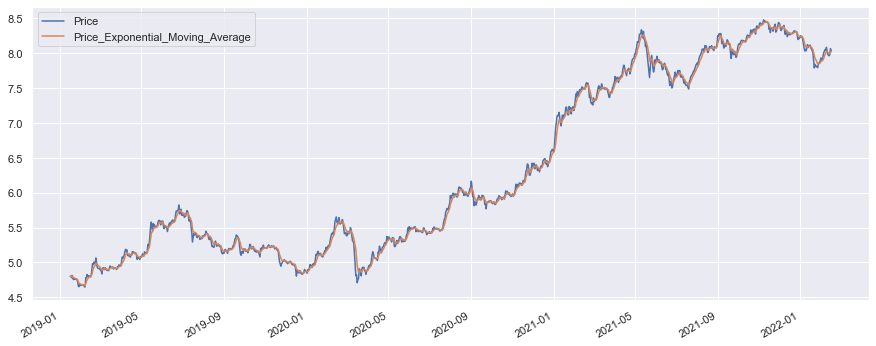

In [277]:
df[['Price','Price_Exponential_Moving_Average']].plot(figsize=(15,6))
# Now graph looks like more smother just like original one so that its good.

#### 3) Exponential weighted Moving Average

Use to make data more smother and stationary.

In [278]:
df['Exponential_Weighted_Moving_Average'] = df['Price'].ewm(span=5).mean()

<AxesSubplot:>

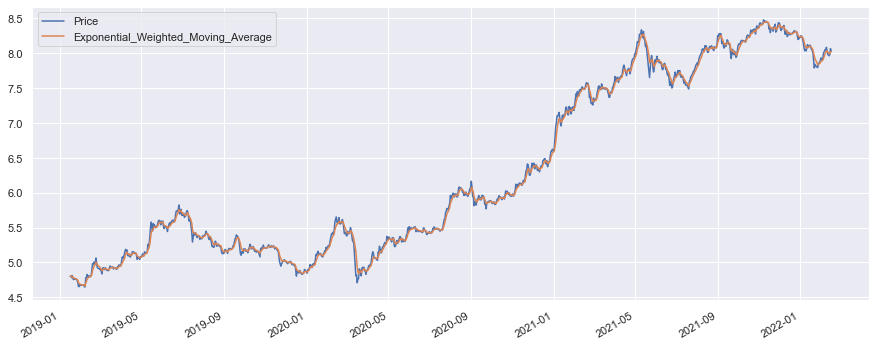

In [279]:
df[['Price','Exponential_Weighted_Moving_Average']].plot(figsize=(15,6))


By Analyzing above methods, we get to know that exponetial weighted moving average is a good methods
we can smother curve like original one.

In [280]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(price):
    result = adfuller(price)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(df['Exponential_Weighted_Moving_Average'])

ADF test statistics : -0.48214494220603726
P-value : 0.895453947237848
#Lags used : 1
Number of observation used : 1066
Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. 


As we can see from the above result we get to know that our data is not stationary and because of that we have to 
apply differencing in order to convert to stationary.

In [281]:
# df['Price_with_differencing'] = df['Exponential_Weighted_Moving_Average']-df['Exponential_Weighted_Moving_Average'].shift(3)
df['Price_with_differencing'] = df['Exponential_Weighted_Moving_Average']

In [282]:
df.head()

,Price,Open,High,Low,Change %,Volume(In Million),Price_Moving_Average,Price_Exponential_Moving_Average,Exponential_Weighted_Moving_Average,Price_with_differencing
2019-01-16,4.801723,4.784069,4.840242,4.779963,1.75,1.342865,NaN,4.801723,4.801723,4.801723
2019-01-17,4.804267,4.801641,7.093713,4.766523,0.25,1.283708,NaN,4.802486,4.803249,4.803249
2019-01-18,4.781977,4.804185,4.805577,4.772970,-2.20,0.951658,NaN,4.796333,4.793173,4.793173
2019-01-19,4.812347,4.781977,4.831269,4.781977,3.09,1.211941,NaN,4.801137,4.801137,4.801137
2019-01-20,4.766609,4.812184,4.816403,4.755743,-4.47,1.368639,NaN,4.790779,4.787882,4.787882


In [283]:
# This test is used to check whether given data is stationary or non stationary?
adfuller_test(df['Price_with_differencing'].dropna())

ADF test statistics : -0.48214494220603726
P-value : 0.895453947237848
#Lags used : 1
Number of observation used : 1066
Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. 


In [284]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

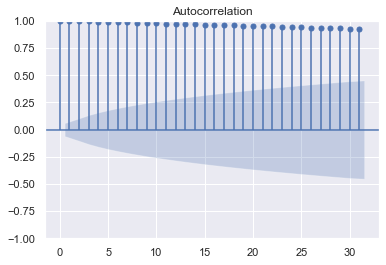

In [285]:
acf = plot_acf(df['Price_with_differencing'].dropna())

From above acf graph we can take q=6

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


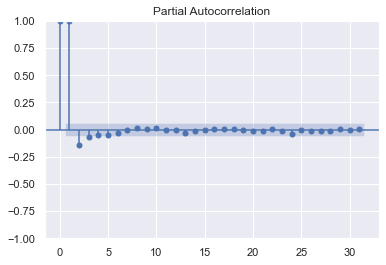

In [286]:
pacf = plot_pacf(df['Price_with_differencing'].dropna())

from above pacf graph we take value of p=2

<AxesSubplot:>

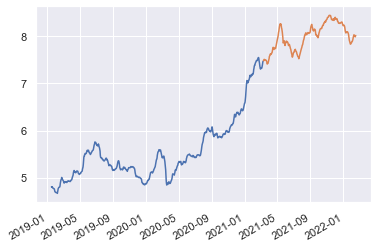

In [287]:
# Split train and test dataset
from datetime import timedelta, datetime

#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

#plotting the data
train['Price_with_differencing'].plot()
valid['Price_with_differencing'].plot()

In [310]:
import statsmodels.api as sm

# ARIMA Model
model = sm.tsa.arima.ARIMA(train['Price_with_differencing'], order=(2, 1, 6))

model_fit = model.fit()
print(model_fit.summary())


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                  
Dep. Variable:     Price_with_differencing   No. Observations:                  747
Model:                      ARIMA(2, 1, 6)   Log Likelihood                2015.274
Date:                     Sun, 27 Mar 2022   AIC                          -4012.547
Time:                             13:29:02   BIC                          -3971.015
Sample:                                  0   HQIC                         -3996.540
                                     - 747                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3015      0.388      3.358      0.001       0.542       2.061
ar.L2         -0.3039      0.384     -0.791      0.429      -1.057       0.449
ma.L1       

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


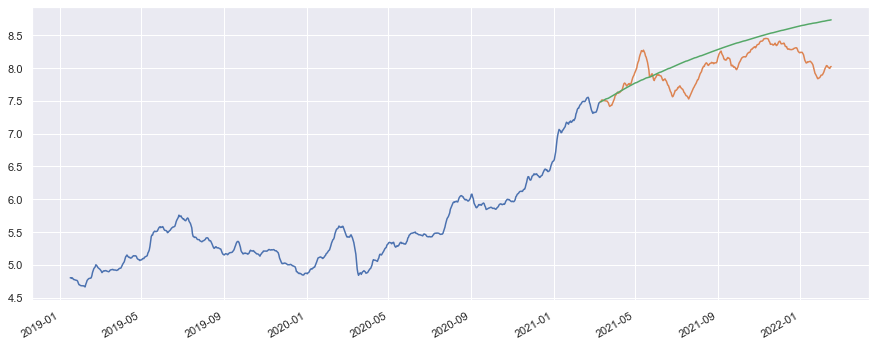

In [311]:
forecast = model_fit.forecast(steps=len(valid))
fc_series = pd.Series(forecast)
fc_series.index = valid.index

train['Price_with_differencing'].plot(figsize=(15, 6)) #Blue line contains tain data.
valid['Price_with_differencing'].plot(figsize=(15, 6)) #Orange line contains valid(test) data.
fc_series.plot(figsize=(15, 6)) #Green line contains predicted line.

plt.show()


In [305]:
# df.to_csv('D:\\Assignement 1\\Data Modeling\\train_test_dataset.csv',index=False)